#India ground water analysis by Rahul B

  India is a country of many famous rivers flowing across the country and the world's highest rainfall zone is in India. The unplanned usage and wastage of water done on many of the states in India is facing a severe shortage of water during summer.  

  This dataset contains 689 rows for each district in India and 16 columns for different statistical data related to water extraction and recharge. The dataset contains data for the year 2017.

  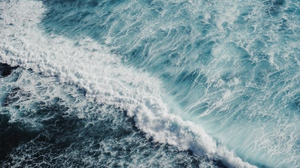


#Import the required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Create DaataFrame

In [ ]:
df = pd.read_excel('IndiaGW.xlsx')

#Data Preprocessing

In [ ]:
df.shape

(689, 16)

In [ ]:
df.head(5)

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
0,1,ANDHRA PRADESH,Anantapur,89200.23,46136.12,1013.97,50415.31,186765.62,9338.31,177427.31,142953.85,14884.94,157838.79,21623.75,59410.09,88.96
1,2,ANDHRA PRADESH,Chittoor,115718.55,32389.60,1204.19,38028.60,187340.94,9367.06,177973.88,95256.50,9597.29,104853.79,13528.83,80858.36,58.92
2,3,ANDHRA PRADESH,East Godavari,104140.05,95383.56,3714.55,50847.53,254085.69,12704.33,241381.36,41688.32,9418.15,51106.47,4226.85,193656.03,21.17
3,4,ANDHRA PRADESH,Guntur,52942.86,57011.90,2547.96,18800.39,131303.10,6565.15,124737.95,39174.72,8942.35,48117.07,14159.10,79051.91,38.57
4,5,ANDHRA PRADESH,Kadapa,93311.68,15869.52,2048.53,11177.61,122407.34,6120.40,116286.94,74888.06,4974.42,79862.47,6110.25,56568.63,68.68


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   S.no.                                                                 689 non-null    int64  
 1   Name of State                                                         689 non-null    object 
 2   Name of District                                                      689 non-null    object 
 3   Recharge from rainfall During Monsoon Season                          684 non-null    float64
 4   Recharge from other sources During Monsoon Season                     684 non-null    float64
 5   Recharge from rainfall During Non Monsoon Season                      684 non-null    float64
 6   Recharge from other sources During Non Monsoon Season                 684 non-null    float64
 7  

In [ ]:
df.isna().sum()

S.no.                                                                   0
Name of State                                                           0
Name of District                                                        0
Recharge from rainfall During Monsoon Season                            5
Recharge from other sources During Monsoon Season                       5
Recharge from rainfall During Non Monsoon Season                        5
Recharge from other sources During Non Monsoon Season                   5
Total Annual Ground Water Recharge                                      5
Total Natural Discharges                                                5
Annual Extractable Ground Water Resource                                5
Current Annual Ground Water Extraction For Irrigation                   5
Current Annual Ground Water Extraction For Domestic & Industrial Use    0
Total Current Annual Ground Water Extraction                            5
Annual GW Allocation for Domestic Use 

#HeatMap

<ipython-input-7-c0f4b57e7c08>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


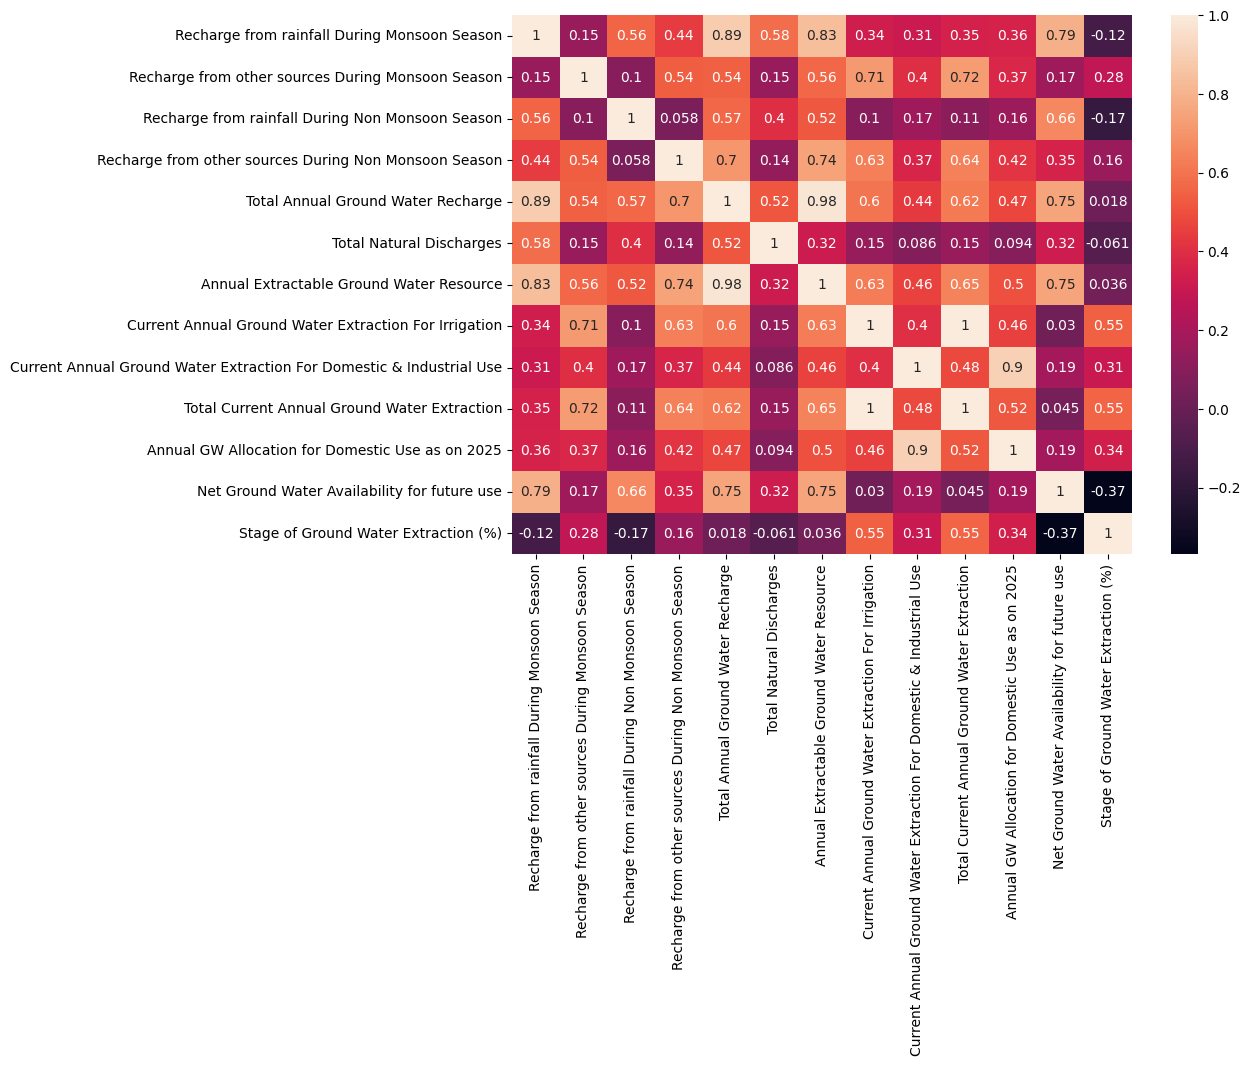

In [ ]:
df.drop('S.no.', axis=1,inplace=True)
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

#State Wise Ground Water Reserve

In [ ]:
#statewise groundwater reserve
state_list = []
total_frnd_water_recharge = []
curr_gw_extr_list = []
future_available_GW_list = []
#Net Ground Water Availability for future use

for state, subset in df.groupby('Name of State'):
    #print(state, sum(subset['Net Ground Water Availability for future use']))
    state_list.append(state)
    total_frnd_water_recharge.append(sum(subset['Total Annual Ground Water Recharge']))
    curr_gw_extr_list.append(sum(subset['Total Current Annual Ground Water Extraction']))
    future_available_GW_list.append(sum(subset['Net Ground Water Availability for future use']))
dfnew = pd.DataFrame({"State":state_list, "GW_Recharge":total_frnd_water_recharge, "GW_Extraction": curr_gw_extr_list, "Future_GW_Available": future_available_GW_list})

<h2>(i) State Wise management of resources with total recharge, extraction,future availability and annual reserve</h2>

In [ ]:
dfnew.sort_values(['GW_Recharge','GW_Extraction'], inplace= True)
dfnew['annual_reserve'] = dfnew['GW_Recharge']-dfnew['GW_Extraction']
dfnew

,State,GW_Recharge,GW_Extraction,Future_GW_Available,annual_reserve
10,Diu,471.00,386.00,6.00,85.00
19,LAKSHADWEEP,1072.80,238.10,122.81,834.70
9,Daman,1304.00,635.00,480.00,669.00
5,CHANDIGARH,4216.00,3378.00,416.00,838.00
8,Dadra & Nagar Haveli,6861.59,2042.86,4475.73,4818.73
24,MIZORAM,21280.76,731.88,18092.91,20548.88
28,Puducherry,22633.18,15140.82,5473.84,7492.36
11,GOA,26722.34,5371.36,6992.81,21350.98
7,DELHI,32100.02,35990.29,2299.43,-3890.27
0,A&N ISLAND,36841.83,908.17,32131.52,35933.66


<h2>(ii) Annual Reserve of Ground water by states, Green bars indicate positive annual reserve, while Red value indicates negative annual reserve.</h2>

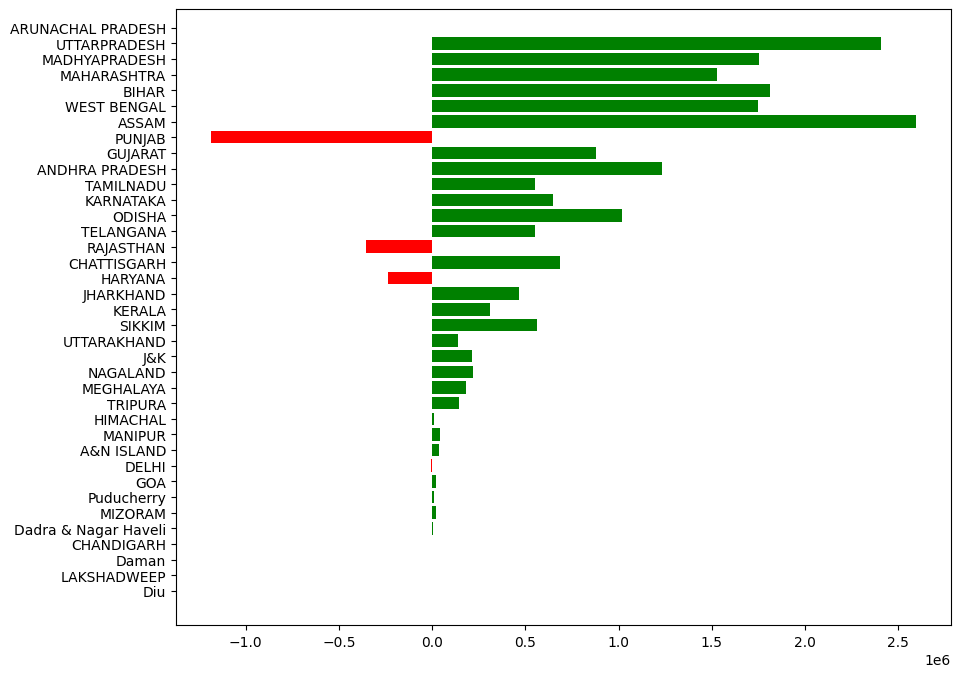

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
plt.barh(dfnew['State'],dfnew['annual_reserve'], color=(dfnew['annual_reserve']>0).map({True: 'g',False: 'r'}))
plt.show()

<h2>(iii) Following analysis indicates Groundwater Extraction vs Availability: Data shows Haryana, Rajasthan, Punjab, Delhi are in critial zone as Ground water Extraction is almost equal to the availability. If groundwater distribution is not planned properly, severe shortage of water can happen in future.</h2>

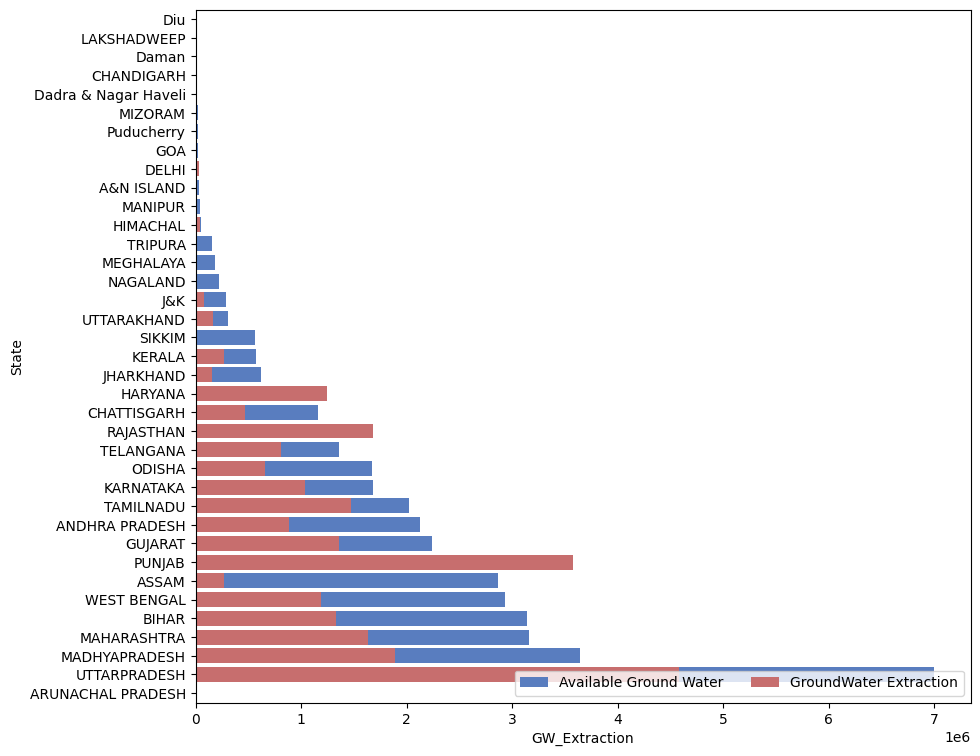

In [ ]:
f, ax = plt.subplots(figsize=(10, 9))

sns.set_color_codes("muted")
sns.barplot(x='GW_Recharge', y= 'State', data = dfnew, label = 'Available Ground Water', color='b')
sns.barplot(x='GW_Extraction', y= 'State', data = dfnew, label = 'GroundWater Extraction', color='r')
ax.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

<h2>(iv) Future Ground water availability in different states in India, No data available for ArunachalPradesh, Other than that Assam , UttarPradesh, Madhya Pradesh and Bihar has higher future Reserve.</h2>

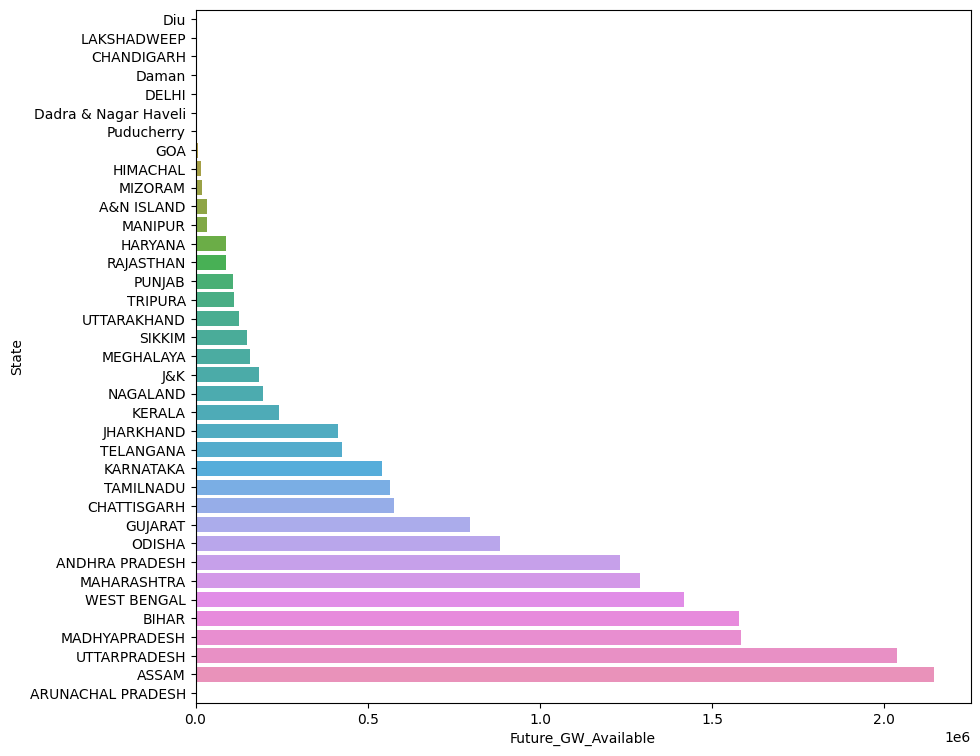

In [ ]:
dfnew.sort_values('Future_GW_Available', inplace = True)
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x='Future_GW_Available', y = 'State',data = dfnew)
plt.show()

In [ ]:
dfnew.count()

State                  37
GW_Recharge            36
GW_Extraction          36
Future_GW_Available    36
annual_reserve         36
dtype: int64

<h1>We will dig litter deeper and check the District level scenario in West-Bengal</h1>

WEST BENGAL

In [ ]:
df_westbengal = df[df['Name of State']=='WEST BENGAL']
df_westbengal.head()

,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
653,WEST BENGAL,Coochbehar,185334.09,5143.37,60379.13,12100.71,262957.30,26295.71,236661.59,42261.5,4447.27,46708.77,5988.25,188411.84,20.0
654,WEST BENGAL,Jalpaiguri,228086.62,3939.51,65301.46,12078.29,309405.88,30940.59,278465.29,8241.2,4395.75,12636.95,5908.97,264315.12,5.0
655,WEST BENGAL,Darjeeling,39186.21,0.00,13052.71,0.00,52238.92,5223.89,47015.03,1169.1,1478.05,2647.15,2012.74,43833.19,6.0
656,WEST BENGAL,Uttar Dinajpur,91467.43,7541.41,22166.67,24353.83,145529.34,12014.51,133514.83,78133.6,4811.27,82944.87,7569.33,47811.90,62.0
657,WEST BENGAL,Dakshin Dinajpur,65504.74,6432.72,17257.72,18756.55,107951.73,9115.64,98836.09,50706.0,2618.71,53324.71,3349.33,44780.76,54.0


TAMILNADU

In [ ]:
df_tamilnadu = df[df['Name of State']=='TAMILNADU']
df_tamilnadu.head()

,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
503,TAMILNADU,Ariyalur,21412.45,14301.91,3331.68,3348.16,42394.20,4239.42,38154.78,14306.59,2217.80,16524.39,2301.58,21546.61,43.31
504,TAMILNADU,Chennai,1273.77,0.00,88.28,478.26,1840.30,184.03,1656.27,0.00,2846.77,2846.77,3045.47,0.00,171.88
505,TAMILNADU,Coimbatore,15816.23,8600.94,6099.50,10118.32,40634.99,4063.50,36571.49,39432.61,5130.64,44563.24,5695.00,1818.67,121.85
506,TAMILNADU,Cuddalore,35024.19,97664.60,23046.50,5592.14,161327.42,16132.72,145194.70,55604.58,34020.92,89625.49,34392.54,60231.30,61.73
507,TAMILNADU,Dharmapuri,15368.45,15549.58,3890.10,6721.86,41529.99,4153.00,37376.99,43580.17,3476.56,47056.73,3951.46,3028.70,125.90


In [ ]:
for state in list(df['Name of State'].unique()):
    print(state)

ANDHRA PRADESH
ARUNACHAL PRADESH
ASSAM
BIHAR
CHATTISGARH
DELHI
GOA
GUJARAT
HARYANA
HIMACHAL
J&K
JHARKHAND
KARNATAKA
KERALA
MADHYAPRADESH
MAHARASHTRA
MANIPUR
MEGHALAYA
MIZORAM
NAGALAND
ODISHA
PUNJAB
RAJASTHAN
SIKKIM
TAMILNADU
TELANGANA
TRIPURA
UTTARPRADESH
UTTARAKHAND
WEST BENGAL
A&N ISLAND
CHANDIGARH
Dadra & Nagar Haveli
Daman
Diu
LAKSHADWEEP
Puducherry


WEST BENGAL

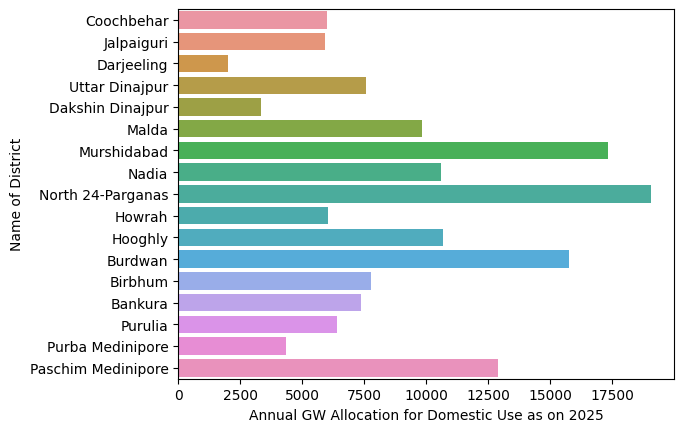

In [ ]:
sns.barplot(x = 'Annual GW Allocation for Domestic Use as on 2025', y = 'Name of District', data = df[df['Name of State']=='WEST BENGAL'])
plt.show()

TAMILNADU

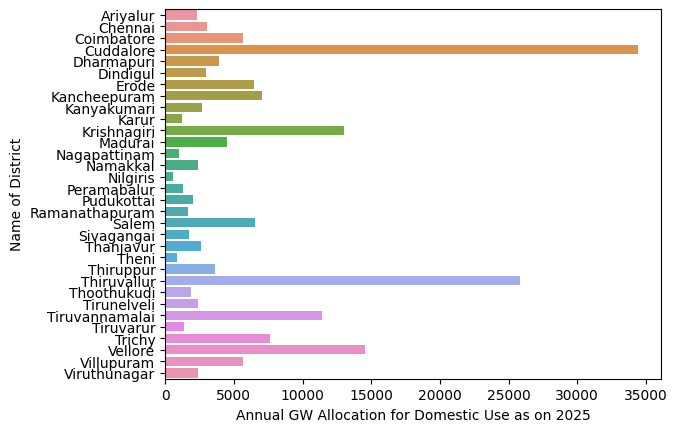

In [ ]:
sns.barplot(x = 'Annual GW Allocation for Domestic Use as on 2025', y = 'Name of District', data = df[df['Name of State']=='TAMILNADU'])
plt.show()

WEST BENGAL WATER EXTRACTION STAGE IN PERCENTAGE

In [ ]:
df_westbengal.sort_values('Stage of Ground Water Extraction (%)',ascending=False, inplace = True)

df_westbengal[['Name of State','Name of District','Stage of Ground Water Extraction (%)']].head(3)

<ipython-input-20-1489d2377c4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_westbengal.sort_values('Stage of Ground Water Extraction (%)',ascending=False, inplace = True)


,Name of State,Name of District,Stage of Ground Water Extraction (%)
660,WEST BENGAL,Nadia,92.0
659,WEST BENGAL,Murshidabad,87.0
661,WEST BENGAL,North 24-Parganas,66.0


TAMILNADU WATER EXTRACTION STAGE IN PERCENTAGE

In [ ]:
df_tamilnadu.sort_values('Stage of Ground Water Extraction (%)',ascending=False, inplace = True)

df_tamilnadu[['Name of State','Name of District','Stage of Ground Water Extraction (%)']].head(3)

<ipython-input-21-4a8658d579c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tamilnadu.sort_values('Stage of Ground Water Extraction (%)',ascending=False, inplace = True)


,Name of State,Name of District,Stage of Ground Water Extraction (%)
504,TAMILNADU,Chennai,171.88
521,TAMILNADU,Salem,145.76
515,TAMILNADU,Nagapattinam,135.92


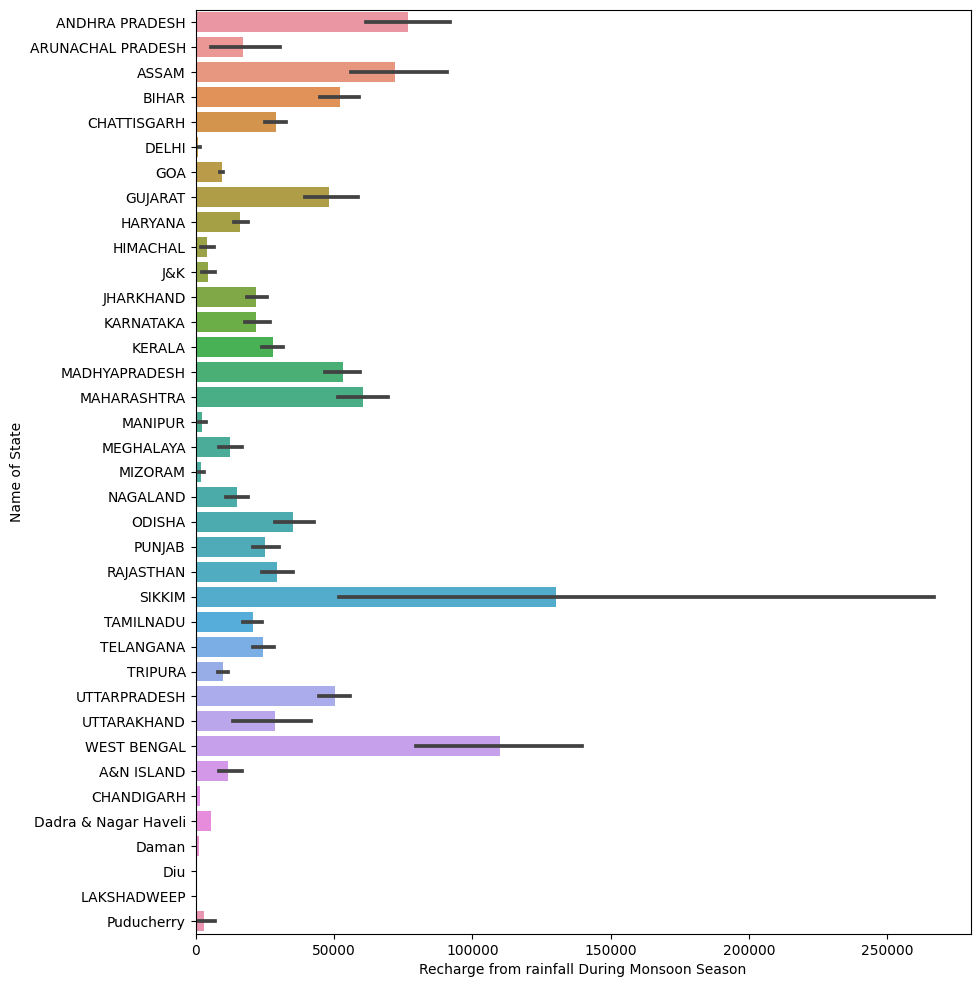

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x='Recharge from rainfall During Monsoon Season', y='Name of State', data = df)
plt.show()

#State wise GW Extraction distribution

0 UTTARPRADESH
1 MADHYAPRADESH
2 BIHAR
3 MAHARASHTRA
4 GUJARAT
5 RAJASTHAN
6 TAMILNADU
7 TELANGANA
8 ODISHA
9 KARNATAKA
10 ASSAM
11 CHATTISGARH
12 JHARKHAND
13 J&K
14 HARYANA
15 PUNJAB
16 WEST BENGAL
17 ARUNACHAL PRADESH
18 KERALA
19 ANDHRA PRADESH
20 DELHI
21 NAGALAND
22 MEGHALAYA
23 MANIPUR
24 LAKSHADWEEP
25 TRIPURA
26 MIZORAM
27 HIMACHAL
28 UTTARAKHAND
29 SIKKIM
30 A&N ISLAND
31 Puducherry
32 GOA
33 CHANDIGARH
34 Dadra & Nagar Haveli
35 Daman


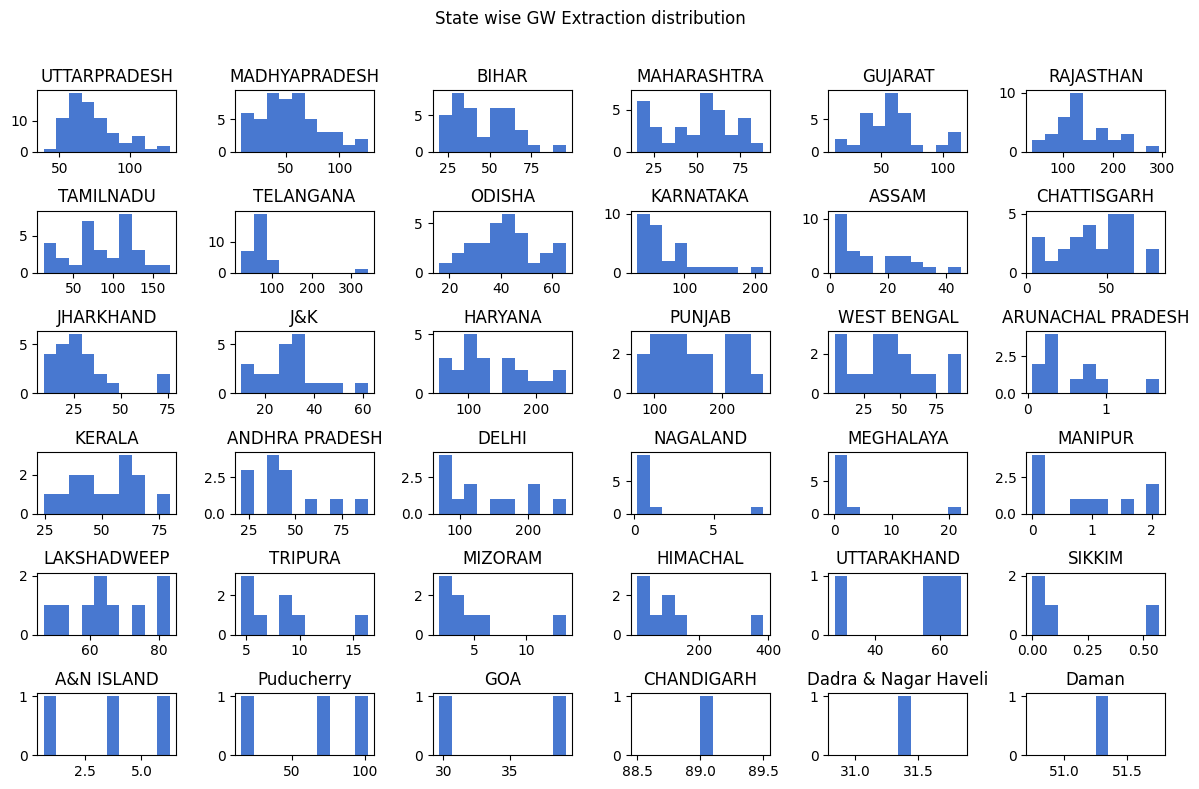

In [ ]:
fig,axs = plt.subplots(6,6,figsize=(12,8))

for idx,state in enumerate(df['Name of State'].value_counts().sort_values(ascending=False)[0:36].index):
    print(idx,state)
    axs[idx//6,idx%6].hist(x = df[df['Name of State']==state]['Stage of Ground Water Extraction (%)'], color='b')
    axs[idx//6,idx%6].set_title(state)
plt.suptitle("State wise GW Extraction distribution")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()